<a href="https://colab.research.google.com/github/wiiloebis/bangkit_machine_learning_assigment/blob/master/Face_Recognizer_Pins_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Presetup

# Download pre-trained FaceNet model
! wget https://github.com/D2KLab/Face-Celebrity-Recognition/raw/master/model/facenet_keras.h5

# install mtcnn
! pip install mtcnn

# to split folder into train/val dataset
! pip install split-folders

--2020-06-16 15:16:26--  https://github.com/D2KLab/Face-Celebrity-Recognition/raw/master/model/facenet_keras.h5
Resolving github.com (github.com)... 13.250.177.223
Connecting to github.com (github.com)|13.250.177.223|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/D2KLab/Face-Celebrity-Recognition/master/model/facenet_keras.h5 [following]
--2020-06-16 15:16:26--  https://raw.githubusercontent.com/D2KLab/Face-Celebrity-Recognition/master/model/facenet_keras.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92397640 (88M) [application/octet-stream]
Saving to: ‘facenet_keras.h5’

facenet_keras.h5    100%[===================>]  88.12M   264MB/s    in 0.3s    

2020-06-16 15:16:35 (264 MB/s) - ‘facenet_

In [3]:
# download the dataset
# preparing kaggle environment to download the dataset, please see https://www.kaggle.com/general/74235
! pip install -q kaggle
from google.colab import files
files.upload() # upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"winniseptiani","key":"805a0b70529185cca7c56d880e4bd576"}'}

In [6]:
# Download and split the dataset into train/val dataset

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d hereisburak/pins-face-recognition
! unzip pins-face-recognition.zip

import split_folders
training_examples = 20 # number of pictures, to avoid too long time
validation_examples = 7
collection_dir = 'pins_dataset'

split_folders.fixed(input='105_classes_pins_dataset', output=collection_dir, fixed=(training_examples, validation_examples))

Streaming output truncated to the last 5000 lines.
  inflating: 105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner38_965.jpg  
  inflating: 105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner39_966.jpg  
  inflating: 105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner3_956.jpg  
  inflating: 105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner41_968.jpg  
  inflating: 105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner42_969.jpg  
  inflating: 105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner44_970.jpg  
  inflating: 105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner45_971.jpg  
  inflating: 105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner46_972.jpg  
  inflating: 105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner47_973.jpg  
  inflating: 105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner48_974.jpg  
  inflating: 105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner49_975.jpg  
  inflating: 105_classes_pins_dataset

Copying files: 17534 files [00:02, 6552.61 files/s]


In [0]:
import mtcnn
import numpy as np
import os
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt

import pandas as pd
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense  
from keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math  
import datetime
import time

In [8]:
from keras.models import load_model
model = load_model('facenet_keras.h5')
print(model.inputs)
print(model.outputs)
# vgg16 = applications.VGG16(include_top=False, weights='imagenet')
# datagen = ImageDataGenerator(rescale=1. / 255)

[<tf.Tensor 'input_1:0' shape=(None, 160, 160, 3) dtype=float32>]
[<tf.Tensor 'Bottleneck_BatchNorm/cond/Identity:0' shape=(None, 128) dtype=float32>]


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


## Create Face Only Dataset

Purpose for this cell is to create a face only dataset from the given dataset, then save all the detected face to faces-only-dataset.npz format

path1:  pin_dataset/trainpins_kiernen shipka/
path2:  pin_dataset/train/pins_kiernen shipka/
processing pin_dataset/train/pins_kiernen shipka/ (1 out of 105)...
>loaded 176 examples for class: pins_kiernen shipka
path1:  pin_dataset/trainpins_Emilia Clarke/
path2:  pin_dataset/train/pins_Emilia Clarke/
processing pin_dataset/train/pins_Emilia Clarke/ (2 out of 105)...
pin_dataset/train/pins_Emilia Clarke/Emilia Clarke70_1043.jpg face cannot be detected


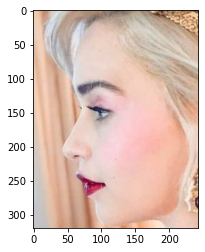

pin_dataset/train/pins_Emilia Clarke/Emilia Clarke78_1050.jpg face cannot be detected


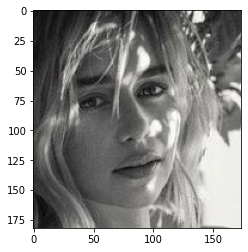

pin_dataset/train/pins_Emilia Clarke/Emilia Clarke48_1021.jpg face cannot be detected


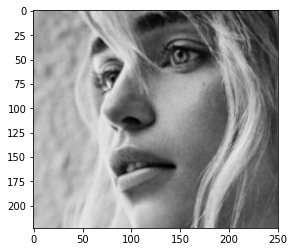

>loaded 180 examples for class: pins_Emilia Clarke
path1:  pin_dataset/trainpins_Eliza Taylor/
path2:  pin_dataset/train/pins_Eliza Taylor/
processing pin_dataset/train/pins_Eliza Taylor/ (3 out of 105)...
>loaded 135 examples for class: pins_Eliza Taylor
path1:  pin_dataset/trainpins_Neil Patrick Harris/
path2:  pin_dataset/train/pins_Neil Patrick Harris/
processing pin_dataset/train/pins_Neil Patrick Harris/ (4 out of 105)...
>loaded 89 examples for class: pins_Neil Patrick Harris
path1:  pin_dataset/trainpins_Millie Bobby Brown/
path2:  pin_dataset/train/pins_Millie Bobby Brown/
processing pin_dataset/train/pins_Millie Bobby Brown/ (5 out of 105)...
>loaded 164 examples for class: pins_Millie Bobby Brown
path1:  pin_dataset/trainpins_Lionel Messi/
path2:  pin_dataset/train/pins_Lionel Messi/
processing pin_dataset/train/pins_Lionel Messi/ (6 out of 105)...
>loaded 59 examples for class: pins_Lionel Messi
path1:  pin_dataset/trainpins_Bill Gates/
path2:  pin_dataset/train/pins_Bill G

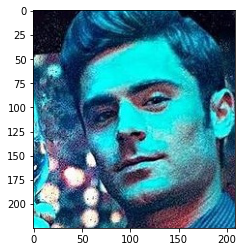

>loaded 163 examples for class: pins_Zac Efron
path1:  pin_dataset/trainpins_tom ellis/
path2:  pin_dataset/train/pins_tom ellis/
processing pin_dataset/train/pins_tom ellis/ (11 out of 105)...
pin_dataset/train/pins_tom ellis/tom ellis133_4279.jpg face cannot be detected


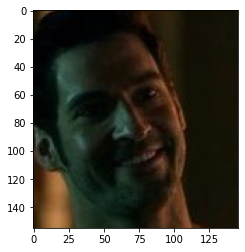

>loaded 152 examples for class: pins_tom ellis
path1:  pin_dataset/trainpins_Dwayne Johnson/
path2:  pin_dataset/train/pins_Dwayne Johnson/
processing pin_dataset/train/pins_Dwayne Johnson/ (12 out of 105)...
>loaded 114 examples for class: pins_Dwayne Johnson
path1:  pin_dataset/trainpins_Jimmy Fallon/
path2:  pin_dataset/train/pins_Jimmy Fallon/
processing pin_dataset/train/pins_Jimmy Fallon/ (13 out of 105)...
>loaded 86 examples for class: pins_Jimmy Fallon
path1:  pin_dataset/trainpins_melissa fumero/
path2:  pin_dataset/train/pins_melissa fumero/
processing pin_dataset/train/pins_melissa fumero/ (14 out of 105)...
>loaded 127 examples for class: pins_melissa fumero
path1:  pin_dataset/trainpins_Christian Bale/
path2:  pin_dataset/train/pins_Christian Bale/
processing pin_dataset/train/pins_Christian Bale/ (15 out of 105)...
>loaded 127 examples for class: pins_Christian Bale
path1:  pin_dataset/trainpins_scarlett johansson/
path2:  pin_dataset/train/pins_scarlett johansson/
proce

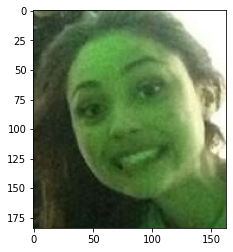

>loaded 141 examples for class: pins_Lindsey Morgan
path1:  pin_dataset/trainpins_margot robbie/
path2:  pin_dataset/train/pins_margot robbie/
processing pin_dataset/train/pins_margot robbie/ (19 out of 105)...
pin_dataset/train/pins_margot robbie/margot robbie32_3213.jpg face cannot be detected


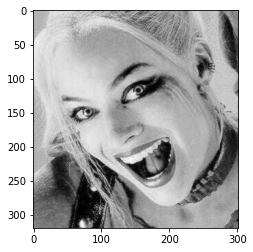

>loaded 193 examples for class: pins_margot robbie
path1:  pin_dataset/trainpins_Morgan Freeman/
path2:  pin_dataset/train/pins_Morgan Freeman/
processing pin_dataset/train/pins_Morgan Freeman/ (20 out of 105)...
pin_dataset/train/pins_Morgan Freeman/Morgan Freeman10_3028.jpg face cannot be detected


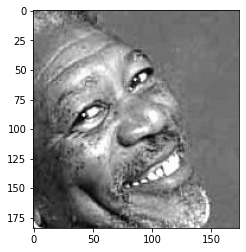

pin_dataset/train/pins_Morgan Freeman/Morgan Freeman57_3118.jpg face cannot be detected


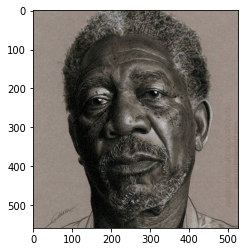

pin_dataset/train/pins_Morgan Freeman/Morgan Freeman168_3063.jpg face cannot be detected


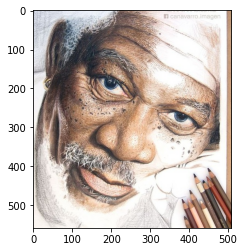

pin_dataset/train/pins_Morgan Freeman/Morgan Freeman46_3114.jpg face cannot be detected


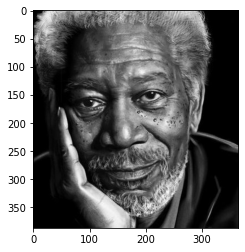

>loaded 74 examples for class: pins_Morgan Freeman
path1:  pin_dataset/trainpins_Tom Hardy/
path2:  pin_dataset/train/pins_Tom Hardy/
processing pin_dataset/train/pins_Tom Hardy/ (21 out of 105)...
>loaded 171 examples for class: pins_Tom Hardy
path1:  pin_dataset/trainpins_Bobby Morley/
path2:  pin_dataset/train/pins_Bobby Morley/
processing pin_dataset/train/pins_Bobby Morley/ (22 out of 105)...
pin_dataset/train/pins_Bobby Morley/Bobby Morley134_279.jpg face cannot be detected


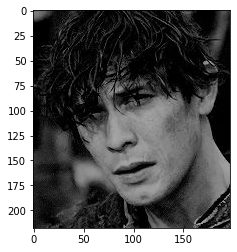

>loaded 110 examples for class: pins_Bobby Morley
path1:  pin_dataset/trainpins_Mark Ruffalo/
path2:  pin_dataset/train/pins_Mark Ruffalo/
processing pin_dataset/train/pins_Mark Ruffalo/ (23 out of 105)...
pin_dataset/train/pins_Mark Ruffalo/Mark Ruffalo204_3263.jpg face cannot be detected


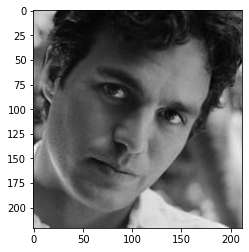

>loaded 150 examples for class: pins_Mark Ruffalo
path1:  pin_dataset/trainpins_Robert De Niro/
path2:  pin_dataset/train/pins_Robert De Niro/
processing pin_dataset/train/pins_Robert De Niro/ (24 out of 105)...
pin_dataset/train/pins_Robert De Niro/Robert De Niro46_777.jpg face cannot be detected


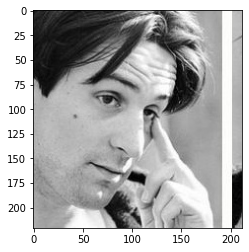

In [0]:
def extract_face(filename, required_size=(160,160)):
    image = Image.open(filename)
    image = image.convert('RGB')
    pixels = asarray(image)
    # detect face
    detector = MTCNN()
    results = detector.detect_faces(pixels)
    # bounding box
    face_array = None
    if len(results) > 0: # there is a possibility the face in the photo can not be detected
      x1, y1, width, height = results[0]['box'] # assuming the photo only contains one face     
      x1, y1 = abs(x1), abs(y1)
      x2, y2 = x1 + width, y1 + height
      face = pixels[y1:y2, x1:x2]
      image = Image.fromarray(face)
      image = image.resize(required_size)
      face_array = asarray(image)
    else:
      print(f'{filename} face cannot be detected')
      plt.imshow(pixels)
      plt.show()
    return face_array

def load_faces(directory):
    faces = []
    for filename in os.listdir(directory):
      # path = f'{directory}/{filename}'
      path = os.path.join(directory, filename)
      face = extract_face(path)
      # print("path: ", path)
      if face is not None:
        faces.append(face)
    return faces

def load_dataset(directory):
    x, y = [], []
    counter = 1
    for subdir in os.listdir(directory):
      # path = directory + subdir + '/' # e.g: train/ben_afflect/
      path = directory + subdir + '/' # e.g: train/ben_afflect/
      print("path1: ", path)
      path = os.path.join(directory, subdir + '/') # e.g: train/ben_afflect/
      print("path2: ", path)
      print(f'processing {path} ({counter} out of {len(os.listdir(directory))})...')
      faces = load_faces(path)
      labels = [subdir for i in range(len(faces))] # assign label to each face
      x.extend(faces)
      y.extend(labels)
      print('>loaded %d examples for class: %s' % (len(faces), subdir))
      counter += 1
    return asarray(x), asarray(y)

train_dir = os.path.join(collection_dir, 'train')
train_X, train_y = load_dataset(train_dir)
print(train_X.shape, train_y.shape)
val_dir = os.path.join(collection_dir, 'val')
val_X, val_y = load_dataset(val_dir)
print(val_X.shape, val_y.shape)
np.savez_compressed('faces-only-dataset.npz', train_X, train_y, val_X, val_y)

## Create Embedding for Each Face

From the face generated earlier, we create an embedding of the face using FaceNet

In [1]:
import time

data = np.load('faces-only-dataset.npz')
train_X, train_y = data['arr_0'], data['arr_1']
val_X, val_y = data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (train_X.shape[0], test_X.shape[0]))
print('Loaded: ', train_X.shape, train_y.shape, val_X.shape, val_y.shape)

# model = load_model('facenet_keras.h5')
# print('Loaded Model')

vgg16 = applications.VGG16(include_top=False, weights='imagenet')
datagen = ImageDataGenerator(rescale=1. / 255)

def get_embedding(model, face_pixels):
    face_pixels = face_pixels.astype('float32')
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean)/std
    samples = np.expand_dims(face_pixels, axis=0)
    y_hat = model.predict(samples) # get the embedding
    return y_hat

start = time.time()
new_train_X = list()
for face_pixels in train_X:
	embedding = get_embedding(model, face_pixels)
	new_train_X.extend(embedding)
 
new_train_X = asarray(new_train_X)
print(new_train_X.shape)

new_test_X = list()
for face_pixels in test_X:
	embedding = get_embedding(model, face_pixels)
	new_test_X.extend(embedding)
new_test_X = asarray(new_test_X)

print(new_test_X.shape)
end = time.time()
print(f'End processing for {end - start} seconds')

np.savez_compressed('faces-embeddings.npz', new_train_X, train_y, new_test_X, test_y)

NameError: ignored

## Performing Faces Classification

From the embedding, we perform the face classification using SVM model and the embedding as the feature. The target is the face classes (whom the face is)

In [0]:
data = np.load('faces-embeddings.npz')
train_X, train_y = data['arr_0'], data['arr_1']
test_X, test_y = data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (train_X.shape[0], test_X.shape[0]))

from sklearn.preprocessing import Normalizer, LabelEncoder

in_encoder = Normalizer(norm='l2')
train_X = in_encoder.transform(train_X)
test_X = in_encoder.transform(test_X)

out_encoder = LabelEncoder()
out_encoder.fit(train_y)
train_y = out_encoder.transform(train_y)
test_y = out_encoder.transform(test_y)

from sklearn.svm import SVC
model_svm = SVC(kernel='linear', probability=True)
model_svm.fit(train_X, train_y)

from sklearn.metrics import accuracy_score

# predict
yhat_train = model_svm.predict(train_X)
yhat_test = model_svm.predict(test_X)

# score
score_train = accuracy_score(train_y, yhat_train)
score_test = accuracy_score(test_y, yhat_test)

print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

In [0]:
def top_10_prediction(prob, labels):
  label_prob = {}
  counter = 0
  for label in labels:
      label_prob[label.replace(' ', '_')] = prob[counter]*100
      counter += 1

  s = sorted(label_prob.items(), key=lambda x: x[1], reverse=True)[:10]
  for k, v in s:
      print(k.replace('pins_', '').replace('_', ' '), f'{v:.2f}')

In [0]:
# test model on a random example from the test dataset
import random
data = np.load('faces-only-dataset.npz')
test_X_faces = data['arr_2']

selection = random.choice([i for i in range(test_X.shape[0])])
random_face_pixels = test_X_faces[selection]
random_face_emb = test_X[selection]
random_face_class = test_y[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])
# prediction for the face
samples = np.expand_dims(random_face_emb, axis=0)
yhat_class = model_svm.predict(samples)
yhat_prob = model_svm.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])
# plot for fun
plt.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
plt.title(title)
plt.show()
top_10_prediction(yhat_prob[0], out_encoder.classes_)

## Export the Model

Export the model to be used in other environment

In [0]:
from sklearn.externals import joblib 
joblib.dump(model_svm, 'svm_model.pkl')
np.save('face_classes.npy', out_encoder.classes_)